# With a csv fichier  do a dico list (eatch line)

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pylab import *
import csv

def listdico (mon_fichier_csv):   
    listdico=list()
    csvfile = open(mon_fichier_csv,"r")
    reader = csv.DictReader(csvfile , delimiter=' ')
    for item in reader:
        listdico.append(item)
    return listdico
    
print (listdico('Ion.csv')[1]['name'])



K+


# Menbrane Modelisation

# Vrest=E
For eatch Ions K+,Cl-,Na+  GHK Model


In [10]:



#datas for a mammalian cell
T=310 #kelvin
R=1.98*4.2 #V*C/°K-mol
F=96.480 #C/mol
def Vrest (list_dico):
    E = ((R*T)/F)*np.log((float(list_dico[1]['permeabilidad'])*float(list_dico[1]['Cout'])+float(list_dico[2]['permeabilidad'])*float(list_dico[2]['Cout'])+float(list_dico[3]['permeabilidad'])*float(list_dico[3]['Cin']))/(float(list_dico[1]['permeabilidad'])*float(list_dico[1]['Cin'])+float(list_dico[2]['permeabilidad'])*float(list_dico[2]['Cin'])+float(list_dico[3]['permeabilidad'])*float(list_dico[3]['Cout'])))
    return (E)


print(Vrest( listdico('Ion.csv') ))

-86.9367905537


# With a data base( .csv)  do a vector of the Nerst's  equations

In [11]:


T=310 #kelvin
R=1.98*4.2 #V*C/°K-mol
F=96.480 #C/mol

def VNerst (list_dico):
    Vnerst=list()
    for i in range (len(list_dico)):
        Vnerst.append((R*T)/(F*(float(list_dico[i]['valence'])))*np.log((float(list_dico[i]['Cout'])/(float(list_dico[i]['Cin'])))))
              
       
    return Vnerst 

print(VNerst(listdico('Ion.csv')))


[135.29254726617961, -89.037001855838184, 71.45365103934094, -88.555544699477451]


# Solution for a simple RC 


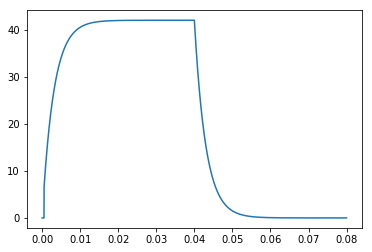

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#Rm = input ("Rm=")
Cm=10**(-6)  #F/cm²
#Istimulation = input ("Istimulation=")
#print (Rm)
#print(Istimulation)
Istimulation=1.4*10**(-2) # incorect value
Rm=3*10**(3)             #incorect value

Vinf = ( float(Istimulation)*float(Rm))

def RC ( Istimulation, timestimulation, timeexperience ):
    t=0
    time = []
    Vmen = [] 
    tbegin=0.0005
    while t < timeexperience :
        t=t + 0.00001
        if t < tbegin:
            Vmen.append(0)
            time.append(t)
        if  tbegin<= t < timestimulation :
            Vm = float(Vinf)*(1-((np.exp((-t)/(float(Rm)*float(Cm))))));
            time.append(t);
            Vmen.append(Vm);
        
        if  timestimulation< t <  timeexperience :
            Vm1 = ((float(Vm))*(np.exp((-t+timestimulation)/(float(Rm)*float(Cm)))));
            time.append(t);
            Vmen.append(Vm1);
            
    return (time, Vmen)
        

          
results = RC(Istimulation, 0.04, 0.08)
t = results[0]
V= results[1]
plt.plot( t,V)
plt.show()  

# Passive Menbrane model:

$$
 V_{passive}=
\left\{
\begin{array}{l c} 
(E-V_{\infty})e^{(-t/RC)}+V_{\infty} & 0 < t < T \\
(V_{0}-E)e^{(-t-T)/RC}+E & T < t 
\end{array}
\right.
$$

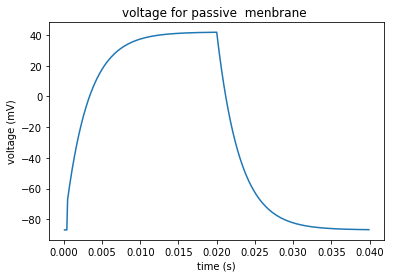

In [23]:
def Vpassive ( Istimulation, timestimulation, timeexperience ):
    E= Vrest( listdico('Ion.csv') )
    t=0
    time = []
    Vmen = []
    Vinf = ( float(Istimulation)*float(Rm))
    while t < timeexperience :
        tbegin=0.0005
        t=t + 0.0001
        if t < tbegin:
            Vmen.append(E)
            time.append(t)
            
        if tbegin<= t < timestimulation :
            Vm = (float(E)-float(Vinf))*((np.exp((-t)/(float(Rm)*float(Cm)))))+float(Vinf);
            time.append(t);
            Vmen.append(Vm);
        
        if  timestimulation< t <  timeexperience :
            Vm1 = (float(Vm)-E)*(np.exp((-t+timestimulation)/(float(Rm)*float(Cm))))+E;
            time.append(t);
            Vmen.append(Vm1);
            
    return (time, Vmen)

results = Vpassive (Istimulation, 0.02, 0.04)
t = results[0]
V= results[1]
plt.title('voltage for passive  menbrane ')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.plot( t,V)
plt.show()  


# Passive menbrane potentiel for eatch Ion

VpassiveIon

In [14]:



def VpassiveIon ( Istimulation, timestimulation, timeexperience,i ):
    VnerstIon= (VNerst( listdico('Ion.csv')) )
    t=0
    time = []
    Vmen = []  
    
    while t < timeexperience :
            t=t + 0.0001
            if t < timestimulation :
                Vm = (float(VnerstIon[i])-float(Vinf))*((np.exp((-t)/(float(Rm)*float(Cm)))))+float(Vinf);
                time.append(t);
                Vmen.append(Vm);
            else :
                 Vm1 = (float(Vm)-float(VnerstIon[i]))*(np.exp((-t+timestimulation)/(float(Rm)*float(Cm))))+VnerstIon[i];
                time.append(t);
                Vmen.append(Vm1);

    return (time, Vmen)
#for i in range (len(VNerst(listdico('Ion.csv')))):
#    results = VpassiveIon (Istimulation, 0.02, 0.04,i)
#    t = results[0]
#    V= results[1]
#    print((listdico('Ion.csv')[i]['name']))
#    plt.title('passive voltage menbrane for')
#    plt.xlabel('time')
#    plt.ylabel('voltage')
#    plt.plot( t,V)
#    plt.show() 
            

# Active menbrane

 Define constants (e.g., G L , g Na , g K , C m , dt) :
 
 Compute initial αs and βs:
 
 Compute initial conditions for state variables (e.g., V m rest , m, h, n):
 
 
 for (time=0 to time=end in increments of dt) :
 
 Compute Currents (e.g., I L , I Na , I K ) :
 
 Compute αs and βs :
 
 Update Differential Equations (V m , m, n, h) :
 Save values of interest into an array (e.g., V m ) :
 end 
 Store values of interest to a file 

$$
\ I_{stim} = I_{Cm}+I_{Ions}=I_{Cm}+I_{Na}+I_{K}+I_{leak} \\
\ I_{stim} = C_{m}({dV_{m}}/dt)+g_{Na}(m^3)h(V_{m})[V_{m}-E_{Na}]+g_{K}(n^4)(V_{m})[V_{m}-E_{K}]+g_{leak}[V_{m}-E_{leak}] \\
\begin{array}{l c} 
\frac{dm}{dt} = \alpha_{m}(1-m)- \beta_{m} m = \frac{m_{\infty}-m}{\tau_{m}} &  \tau_{m}= \frac{1}{\alpha_{m}-\beta_{m}} \\ 
\ m_{\infty}= \frac{\alpha_{m}}{\alpha_{m} + \beta_{m}} \\
\ \beta_{m}= 4e^{(-V_{m}/18)} & \alpha_{m}= \frac{2.5-0.1(V_{m}-V{rest})}{e^{2.5-0.1(V_{m}-V{rest})}-1} \\
\frac{dh}{dt} = \alpha_{h}(1-h)- \beta_{h} h = \frac{h_{\infty}-h}{ \tau_{h}} & \tau_{h}= \frac{1}{\alpha_{h}-\beta_{h}} \\
\ h_{\infty}= \frac{\alpha_{h}}{\alpha_{h} + \beta_{h}} \\
\ \beta_{h}= \frac{1}{e^{(30-(V_{m}-V{rest})))/10}+1} & \alpha_{h}=0.07 e^{(V_{m}-V{rest})/20} \\
\frac{dn}{dt} = \alpha_{n}(1-n)- \beta_{n} n = \frac{n_{\infty}-n}{ \tau_{n}} & \tau_{n}= \frac{1}{\alpha_{n}-\beta_{n} }\\
\ n_{\infty}= \frac{\alpha_{n}}{\alpha_{n} + \beta_{n}} \\
\ \beta_{n}= 0.125e^{(-(V_{m}-V{rest})/80} & \alpha_{n}=0.01 \frac{10-(V_{m}-V{rest})}{e^{(1-0.1(V_{m}-V{rest})))}-1} \\
\ V_{m}(t=0)=V_{rest} => V_{m}(t=0)-V_{rest}=0 \\
\ m(t=0) = m( t= \infty )=0.05 & h(t=0) =n(t= \infty )=0.6 \\
\end{array}
$$


# Better way to medelise a active menbrane 

Istim cst


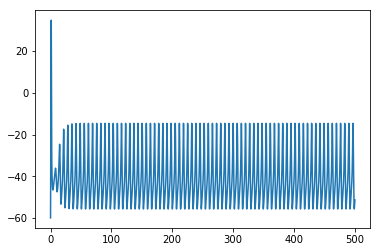

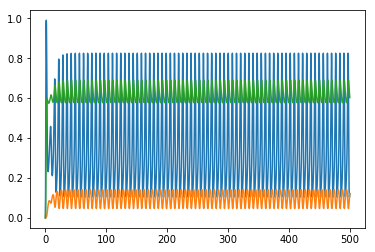

In [5]:
% matplotlib inline
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#Cm=1.0e-2 #F/cm²                  
#gNa = 3.32 #μS datas from the the Traub model not exactly the same as us...
#gCa = 6.64  #μS 
#gK = 3.98  #μS
#Vmrest=Vrest( listdico('Ion.csv') )lkn
Vmrest=-70
h0=0
n0=0
m0=0
V0=-60
Istim=1
#gl=0.3  #mS/cm²
#Vl=10.613 #mV

#Cm = 0.01
#gNa = 120
#gK = 36
#gl = 0.3
#vNa = 55.15
#vK = -49.42
#Vl = -72.14
Cm = 0.01
gNa = 1.20
gK = 0.36
gL = 0.003
vNa = 55.15
vK = -72.14
vL =  -49.42



def FVm(y,t,gNa,Istim):
    #Am=(2.5-0.1*(y[0]-Vmrest))/(np.exp(2.5-0.1*(y[0]-Vmrest))-1)
    
    #Bm=4*np.exp(-y[0]/18)
    #An=0.01*(10-(y[0]-Vmrest))/(np.exp(1-0.1*(y[0]-Vmrest))-1)
    #Bn=0.125*np.exp(-(y[0]-Vmrest)/80) 
    #Ah=0.7*np.exp((y[0]-Vmrest)/20) 
    #Bh=1/(np.exp(3.0-0.1*(y[0]-Vmrest))+1)
    
    An = (0.01*(y[0]+50.0))/(1.0-np.exp(-(y[0]+50.0)/10.0))
    Bn = 0.125*np.exp(-(y[0]+60.0)/80.0)
    Am = (0.1*(y[0]+35.0))/(1-np.exp(-(y[0]+35.0)/10.0))
    Bm = 4.0*np.exp(-(y[0]+60.0)/18.0)
    Ah = 0.07*np.exp(-(y[0]+60.0)/20.0)
    Bh = 1.0/(1.0+np.exp(-(y[0]+30.0)/10.0))   
    #dVmdt=(1/Cm)*(Istim-gNa*(y[1]**(3))*(y[2])*(y[0]-(float(VNerst(listdico('Ion.csv'))[2])))-gK*(y[3]**(4))*(y[0]-(float(VNerst(listdico('Ion.csv'))[1])))-gl*(y[0]-Vl))
    dVmdt=(1/Cm)*(Istim-gNa*(y[1]**(3))*(y[2])*(y[0]-vNa)-gK*(y[3]**(4))*(y[0]-vK)-gL*(y[0]-vL))
    dmdt=Am*(1-y[1])-Bm*y[1]
    dndt=An*(1-y[3])-Bn*y[3]
    dhdt=Ah*(1-y[2])-Bh*y[2]
    #y[0]=Vm    y[1]=m     y[2]=h   y[3]=n 
    return [dVmdt,dmdt,dhdt,dndt ]

y0=[V0,m0,h0,n0]

time1=np.linspace(0,500,100000)
Vm1=odeint(FVm,y0,time1,args=(gNa,Istim))
VM , m , h , n = Vm1[:,0] , Vm1[:,1] , Vm1[:,2] ,  Vm1[:,3] 

print('Istim cst')
plt.plot(time1,VM)
plt.show()
plt.plot(time1,m)
plt.plot(time1,h)
plt.plot(time1,n)
plt.show()



Vmactive


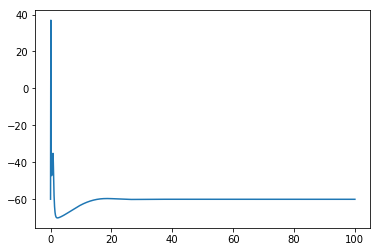

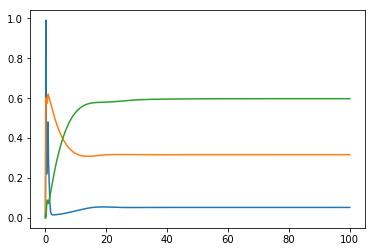

In [15]:
def activemenbrane(FonctionVm,Vmrest,Istim,tstim,texp,m0,h0,n0):
    n1=100
    n2=1000
    n3=10000
    global L
    timerepos=np.linspace(0,0.1,n1)
    y0=[V0,m0,h0,n0]
    Vm1=odeint(FVm,y0,timerepos,args=(gNa,0))
    VM , m , h , n = Vm1[:,0] , Vm1[:,1] , Vm1[:,2] ,  Vm1[:,3]
    timestim=np.linspace(0.01,tstim+0.1,n2)
    #timestim1=np.linspace(0,tstim,n1)
    y1=list()
    y1=[VM[n1-1],m[n1-1],h[n1-1],n[n1-1]]
    Vm2=odeint(FVm,y1,timestim,args=(gNa,Istim))
    VM=np.append(VM,Vm2[:,0])
    m=np.append(m,Vm2[:,1])
    n=np.append(n,Vm2[:,3])
    h=np.append(h,Vm2[:,2])
    #Vm2=odeint(FonctionVm,Vm1[n-1],timestim1,args=((Ina,Ik,Istim,VNerst,listdico)))
    timeexp=np.linspace(tstim+0.1,texp,n3)
    #timeexp1=np.linspace(0,texp-(tstim+0.01),n2)
    y2=[VM[n1+n2-2],m[n1+n2-2],h[n1+n2-2],n[n1+n2-2]]
    Vm3=odeint(FVm,y2,timeexp,args=(gNa,0))
    #Vm3=odeint(FonctionVm,VM1[n+n1-1],timeexp1,args=((Ina,Ik,0,VNerst,listdico)))
    VM=np.append(VM,Vm3[:,0])
    m=np.append(m,Vm3[:,1])
    n=np.append(n,Vm3[:,3])
    h=np.append(h,Vm3[:,2])
    global timeactive
    timeactive=np.linspace(0,texp,n1+n2+n3)
   
    return timeactive,VM, m, h,n
tstim=10
texp=100
timeactive, VM ,m , h ,n = activemenbrane(FVm,Vmrest,Istim,tstim,texp,m0,h0,n0)
print('Vmactive')
plt.plot(timeactive,VM)
plt.show()
plt.plot(timeactive,m)
plt.plot(timeactive,n)
plt.plot(timeactive,h)
plt.show()

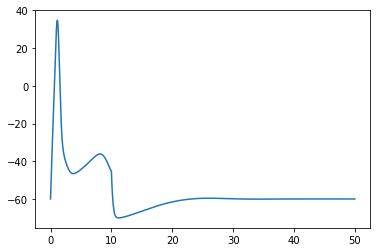

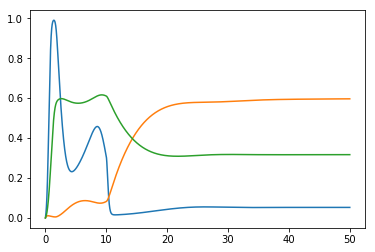

In [16]:
def An(V):
    return (0.01*(V+50.0))/(1.0-np.exp(-(V+50.0)/10.0))
def Bn(V):
    return 0.125*np.exp(-(V+60.0)/80.0)
def Am(V):
    return (0.1*(V+35.0))/(1-np.exp(-(V+35.0)/10.0))
def Bm(V):
    return 4.0*np.exp(-(V+60.0)/18.0)
def Ah(V):
    return 0.07*np.exp(-(V+60.0)/20.0)
def Bh(V):
    return 1.0/(1.0+np.exp(-(V+30.0)/10.0)) 
def dmdt(V,m,Am,Bm):
    return Am(V)*(1-m)-Bm(V)*m
def dndt(V,n,An,Bn):
    return An(V)*(1-n)-Bn(V)*n
def dhdt(V,h,Ah,Bh):
    return Ah(V)*(1-h)-Bh(V)*h
def FIstim(t,tstim,Istim):
    if t < tstim:
        I=Istim
    else :
        I=0
    return I
        
def Fonction(y,t,FIstim,Am,Bm,An,Bn,Ah,Bh,tstim,Istim):
    #V , m, h , n = y
    V = y[0]
    m = y[1]
    h = y[2]
    n = y[3]
    dmdt= Am(V)*(1-y[1])-Bm(V)*y[1]
    dhdt= Ah(V)*(1-y[2])-Bh(V)*y[2]
    dndt= An(V)*(1-y[3])-Bn(V)*y[3]
    
    return [(1/Cm)*(FIstim(t,tstim,Istim)-gNa*(np.power(m,3))*h*(V-vNa)-gK*(np.power(n,4))*(V-vK)-gL*(V-vL)),dmdt,dhdt,dndt ]

y0=[V0,m0,h0,n0]
tstim=10

time1=np.linspace(0,50,100000)
Vm1=odeint(Fonction,y0,time1,args=(FIstim,Am,Bm,An,Bn,Ah,Bh,tstim,Istim))
VM , m , h , n = Vm1[:,0] , Vm1[:,1] , Vm1[:,2] ,  Vm1[:,3] 


plt.plot(time1,VM)
plt.show()
plt.plot(time1,m)
plt.plot(time1,h)
plt.plot(time1,n)
plt.show()

